![alt text](./image_files/pageheader_rose2_babies.jpg)

# Data Science in Medicine using Python

### Author: Dr Gusztav Belteki

### 1. Summary of the data processing we did so far and a little reminder

In [1]:
%%time

import datetime
import os
import pandas as pd

flist = [fle for fle in os.listdir('data') if 'slow_Measurement' in fle]

data_dict = {} # Creates an empty dictionary

for file in flist:
    print(datetime.datetime.now(), file)
    path = os.path.join('data', file,)
    tag = file[11:-25]
    data_dict[tag] = pd.read_csv(path, parse_dates = [['Date', 'Time']])
    data_dict[tag] = data_dict[tag].set_index('Date_Time')
    
    new_columns = [item[5:] for item in data_dict[tag].columns if item.startswith('5001')]
    new_columns = ['Time [ms]', 'Rel.Time [s]'] + new_columns
    data_dict[tag].columns = new_columns
    
    data_dict[tag] = data_dict[tag].resample('1S').mean()
    
    columns_to_drop = ['Tispon [s]', 'I:Espon (I-Part) [no unit]', 'I:Espon (E-Part) [no unit]']
    data_dict[tag] = data_dict[tag].drop(columns_to_drop, axis = 1)
    data_dict[tag].to_csv('%s' %tag)

2021-05-07 14:43:00.417962 CsvLogBase_2019-01-16_090910.423_slow_Measurement.csv.zip
2021-05-07 14:43:04.606432 CsvLogBase_2020-11-02_134238.904_slow_Measurement.csv.zip
2021-05-07 14:43:18.689530 CsvLogBase_2019-01-14_124200.144_slow_Measurement.csv.zip
CPU times: user 21.2 s, sys: 1.57 s, total: 22.8 s
Wall time: 23.5 s


##### "Computer programs are for human to read and occasionally for computers to run"

You want to be more verbose particularly when learning Python

In [2]:
%%time

# Import the required libraries
import datetime
import os
import pandas as pd

# From the files in 'Data' sub-directory only consider those ones which contain 'slow_Measurement'
flist = [fle for fle in os.listdir('data') if 'slow_Measurement' in fle]

data_dict = {} # Creates an empty dictionary

for file in flist: # Loop through all relevant data files
    
    print(datetime.datetime.now(), file)
    
    # The relative filepath to the files
    path = os.path.join('data', file,)
    
    # Use the specific part of the filename as a unique key for the dictionary
    tag = file[11:-25]
    
    # Import data, parse the 'Date' and 'Time' columns as datetime and combine them
    data_dict[tag] = pd.read_csv(path, parse_dates = [['Date', 'Time']])
    # Set the combined 'Date_Time' column as row index 
    data_dict[tag] = data_dict[tag].set_index('Date_Time')
    
    # Remove the '5001' pre-tag from the column names
    new_columns = [item[5:] for item in data_dict[tag].columns if item.startswith('5001')]
    new_columns = ['Time [ms]', 'Rel.Time [s]'] + new_columns
    data_dict[tag].columns = new_columns
    
    # As data were retrieved in two batches every second, combine these data by using the mean() function
    data_dict[tag] = data_dict[tag].resample('1S').mean()
    
    # Drop columes which have barely any data
    columns_to_drop = ['Tispon [s]', 'I:Espon (I-Part) [no unit]', 'I:Espon (E-Part) [no unit]']
    data_dict[tag] = data_dict[tag].drop(columns_to_drop, axis = 1)
    
    # Export processed data as .csv files with unique names
    data_dict[tag].to_csv('%s' %tag)

2021-05-07 14:43:40.797913 CsvLogBase_2019-01-16_090910.423_slow_Measurement.csv.zip
2021-05-07 14:43:45.320492 CsvLogBase_2020-11-02_134238.904_slow_Measurement.csv.zip
2021-05-07 14:43:59.613151 CsvLogBase_2019-01-14_124200.144_slow_Measurement.csv.zip
CPU times: user 21.4 s, sys: 1.54 s, total: 22.9 s
Wall time: 23.1 s


### 2. A quick look at allt the data

Let us look at the data in more details

In [6]:
# This is a dictionary of DataFrames
data_dict;

In [7]:
data_dict.keys()

dict_keys(['2019-01-16_090910.423', '2020-11-02_134238.904', '2019-01-14_124200.144'])

In [9]:
data_dict.values();

In [10]:
[len(value) for value in data_dict.values()]

[101443, 344677, 104934]

In [11]:
[value.shape for value in data_dict.values()]

[(101443, 42), (344677, 42), (104934, 42)]

### 3. How to process the data further?

Choose one of the 3 recordings initially and study further

In [12]:
data_dict['2019-01-14_124200.144']

,Time [ms],Rel.Time [s],MVe [L/min],MVi [L/min],Cdyn [L/bar],R [mbar/L/s],MVespon [L/min],Rpat [mbar/L/s],MVemand [L/min],FlowDev [L/min],...,VTspon [mL],E [mbar/L],TC [s],TCe [s],C20/Cdyn [no unit],VTe [mL],VTi [mL],EIP [mbar],MVleak [L/min],RRspon [1/min]
Date_Time,,,,,,,,,,,,,,,,,,,,,
2019-01-14 12:42:01,1.547470e+12,0.0,0.15,0.13,0.29,142.0,0.0,129.0,0.15,6.5,...,0.0,3393.0,0.04,0.11,0.58,2.7,2.4,16.0,0.0,NaN
2019-01-14 12:42:02,1.547470e+12,1.0,0.15,0.13,0.29,152.0,0.0,139.0,0.15,6.5,...,0.0,3393.0,0.04,0.11,0.66,2.8,2.6,16.0,0.0,NaN
2019-01-14 12:42:03,1.547470e+12,2.0,0.15,0.13,0.29,152.0,0.0,139.0,0.15,6.5,...,0.0,3429.0,0.04,0.11,0.66,2.8,2.6,16.0,0.0,NaN
2019-01-14 12:42:04,1.547470e+12,3.0,0.15,0.13,0.27,152.0,0.0,139.0,0.15,6.5,...,0.0,3754.0,0.04,0.11,0.66,2.9,2.4,16.0,0.0,NaN
2019-01-14 12:42:05,1.547470e+12,4.0,0.15,0.13,0.27,143.0,0.0,129.0,0.15,6.5,...,0.0,3528.0,0.04,0.11,0.62,2.8,2.6,16.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-15 17:50:50,1.547575e+12,104929.0,0.00,2.38,NaN,NaN,0.0,NaN,0.00,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2019-01-15 17:50:51,1.547575e+12,104930.0,0.00,2.38,NaN,NaN,0.0,NaN,0.00,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2019-01-15 17:50:52,1.547575e+12,104931.0,0.00,2.38,NaN,NaN,0.0,NaN,0.00,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [13]:
data_dict['2019-01-14_124200.144'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 104934 entries, 2019-01-14 12:42:01 to 2019-01-15 17:50:54
Freq: S
Data columns (total 42 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Time [ms]           104934 non-null  float64
 1   Rel.Time [s]        104934 non-null  float64
 2   MVe [L/min]         104893 non-null  float64
 3   MVi [L/min]         104899 non-null  float64
 4   Cdyn [L/bar]        102860 non-null  float64
 5   R [mbar/L/s]        103751 non-null  float64
 6   MVespon [L/min]     104893 non-null  float64
 7   Rpat [mbar/L/s]     102230 non-null  float64
 8   MVemand [L/min]     104893 non-null  float64
 9   FlowDev [L/min]     104899 non-null  float64
 10  VTmand [mL]         104748 non-null  float64
 11  r2 [no unit]        103947 non-null  float64
 12  VTispon [mL]        104916 non-null  float64
 13  Pmin [mbar]         104934 non-null  float64
 14  Pmean [mbar]        104934 non-null  float

Now all the data are in the right format, but...

##### Further issues:
- Tidal volumes, minute volumes and compliance only make sense when normalised to body
- We would like to know the distribution of the data to make sure that they make sense (are there non-sensical data or clear outliers)
- We still have some missing data, what should we do with them?

### 4. Some parameters (`VTs, MVs, Cdyn`) only make sense if normalised to body weight

In [14]:
data_dict['2019-01-14_124200.144'].columns

Index(['Time [ms]', 'Rel.Time [s]', 'MVe [L/min]', 'MVi [L/min]',
       'Cdyn [L/bar]', 'R [mbar/L/s]', 'MVespon [L/min]', 'Rpat [mbar/L/s]',
       'MVemand [L/min]', 'FlowDev [L/min]', 'VTmand [mL]', 'r2 [no unit]',
       'VTispon [mL]', 'Pmin [mbar]', 'Pmean [mbar]', 'PEEP [mbar]',
       'RRmand [1/min]', 'PIP [mbar]', 'VTmand [L]', 'VTspon [L]',
       'VTemand [mL]', 'VTespon [mL]', 'VTimand [mL]', 'VT [mL]', '% leak [%]',
       '% MVspon [%]', 'MV [L/min]', 'RRtrig [1/min]', 'RR [1/min]',
       'I (I:E) [no unit]', 'E (I:E) [no unit]', 'FiO2 [%]', 'VTspon [mL]',
       'E [mbar/L]', 'TC [s]', 'TCe [s]', 'C20/Cdyn [no unit]', 'VTe [mL]',
       'VTi [mL]', 'EIP [mbar]', 'MVleak [L/min]', 'RRspon [1/min]'],
      dtype='object')

In [15]:
to_normalise = ['MVe [L/min]', 'MVi [L/min]', 'Cdyn [L/bar]', 'MVespon [L/min]', 'MVemand [L/min]', 'VTmand [mL]', 
    'VTispon [mL]', 'VTmand [L]', 'VTspon [L]', 'VTemand [mL]', 'VTespon [mL]', 'VTimand [mL]', 'VT [mL]', 
    'MV [L/min]',  'VTspon [mL]', 'VTe [mL]', 'VTi [mL]', 'MVleak [L/min]',]

In [16]:
data_dict.keys()

dict_keys(['2019-01-16_090910.423', '2020-11-02_134238.904', '2019-01-14_124200.144'])

Here we are creating a dictionary with the same keys on the fly but it would be more usefuls (and less prone to error) to import weights from a csv or Excel file into a DataFrame

In [17]:
# Weights in kilogram
weights = {'2019-01-14_124200.144' : 0.575, '2019-01-16_090910.423' : 0.575 , '2020-11-02_134238.904' : 775}

In [18]:
for recording in data_dict: # I could have written datadict.keys(), it is the same
    for par in to_normalise:
        data_dict[recording][f'{par[:-1]}/kg{par[-1]}'] = data_dict[recording][par] / weights[recording]

In [19]:
data_dict['2019-01-14_124200.144']

,Time [ms],Rel.Time [s],MVe [L/min],MVi [L/min],Cdyn [L/bar],R [mbar/L/s],MVespon [L/min],Rpat [mbar/L/s],MVemand [L/min],FlowDev [L/min],...,VTspon [L/kg],VTemand [mL/kg],VTespon [mL/kg],VTimand [mL/kg],VT [mL/kg],MV [L/min/kg],VTspon [mL/kg],VTe [mL/kg],VTi [mL/kg],MVleak [L/min/kg]
Date_Time,,,,,,,,,,,,,,,,,,,,,
2019-01-14 12:42:01,1.547470e+12,0.0,0.15,0.13,0.29,142.0,0.0,129.0,0.15,6.5,...,0.0,4.695652,0.0,4.173913,4.695652,0.260870,0.0,4.695652,4.173913,0.0
2019-01-14 12:42:02,1.547470e+12,1.0,0.15,0.13,0.29,152.0,0.0,139.0,0.15,6.5,...,0.0,4.869565,0.0,4.521739,4.869565,0.260870,0.0,4.869565,4.521739,0.0
2019-01-14 12:42:03,1.547470e+12,2.0,0.15,0.13,0.29,152.0,0.0,139.0,0.15,6.5,...,0.0,4.869565,0.0,4.521739,4.869565,0.260870,0.0,4.869565,4.521739,0.0
2019-01-14 12:42:04,1.547470e+12,3.0,0.15,0.13,0.27,152.0,0.0,139.0,0.15,6.5,...,0.0,5.043478,0.0,4.173913,5.043478,0.260870,0.0,5.043478,4.173913,0.0
2019-01-14 12:42:05,1.547470e+12,4.0,0.15,0.13,0.27,143.0,0.0,129.0,0.15,6.5,...,0.0,5.043478,0.0,4.173913,5.043478,0.260870,0.0,4.869565,4.521739,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-15 17:50:50,1.547575e+12,104929.0,0.00,2.38,NaN,NaN,0.0,NaN,0.00,NaN,...,0.0,NaN,0.0,NaN,NaN,0.417391,0.0,NaN,NaN,0.0
2019-01-15 17:50:51,1.547575e+12,104930.0,0.00,2.38,NaN,NaN,0.0,NaN,0.00,NaN,...,0.0,NaN,0.0,NaN,NaN,0.417391,0.0,NaN,NaN,0.0
2019-01-15 17:50:52,1.547575e+12,104931.0,0.00,2.38,NaN,NaN,0.0,NaN,0.00,NaN,...,0.0,NaN,0.0,NaN,NaN,0.417391,0.0,NaN,NaN,0.0


In [20]:
data_dict['2019-01-14_124200.144'].columns

Index(['Time [ms]', 'Rel.Time [s]', 'MVe [L/min]', 'MVi [L/min]',
       'Cdyn [L/bar]', 'R [mbar/L/s]', 'MVespon [L/min]', 'Rpat [mbar/L/s]',
       'MVemand [L/min]', 'FlowDev [L/min]', 'VTmand [mL]', 'r2 [no unit]',
       'VTispon [mL]', 'Pmin [mbar]', 'Pmean [mbar]', 'PEEP [mbar]',
       'RRmand [1/min]', 'PIP [mbar]', 'VTmand [L]', 'VTspon [L]',
       'VTemand [mL]', 'VTespon [mL]', 'VTimand [mL]', 'VT [mL]', '% leak [%]',
       '% MVspon [%]', 'MV [L/min]', 'RRtrig [1/min]', 'RR [1/min]',
       'I (I:E) [no unit]', 'E (I:E) [no unit]', 'FiO2 [%]', 'VTspon [mL]',
       'E [mbar/L]', 'TC [s]', 'TCe [s]', 'C20/Cdyn [no unit]', 'VTe [mL]',
       'VTi [mL]', 'EIP [mbar]', 'MVleak [L/min]', 'RRspon [1/min]',
       'MVe [L/min/kg]', 'MVi [L/min/kg]', 'Cdyn [L/bar/kg]',
       'MVespon [L/min/kg]', 'MVemand [L/min/kg]', 'VTmand [mL/kg]',
       'VTispon [mL/kg]', 'VTmand [L/kg]', 'VTspon [L/kg]', 'VTemand [mL/kg]',
       'VTespon [mL/kg]', 'VTimand [mL/kg]', 'VT [mL/kg]', 'MV [L

### 5. Analyse the distribution of the data

In [21]:
data_dict['2019-01-14_124200.144'].describe()

,Time [ms],Rel.Time [s],MVe [L/min],MVi [L/min],Cdyn [L/bar],R [mbar/L/s],MVespon [L/min],Rpat [mbar/L/s],MVemand [L/min],FlowDev [L/min],...,VTspon [L/kg],VTemand [mL/kg],VTespon [mL/kg],VTimand [mL/kg],VT [mL/kg],MV [L/min/kg],VTspon [mL/kg],VTe [mL/kg],VTi [mL/kg],MVleak [L/min/kg]
count,1.049340e+05,104934.000000,104893.000000,104899.000000,102860.000000,103751.000000,104893.000000,102230.000000,104893.000000,104899.000000,...,104916.000000,104748.000000,104916.000000,104747.000000,104748.000000,104899.000000,104917.000000,104749.000000,104747.000000,104899.000000
mean,1.547522e+12,52466.500010,0.168037,0.180578,0.294409,188.858211,0.001355,177.272765,0.166236,6.654325,...,0.000005,5.372631,0.055365,5.467265,5.541377,0.310298,0.057951,5.371867,5.460153,0.024839
std,3.029198e+07,30291.980908,0.045607,0.156095,0.177860,66.492037,0.005534,66.164369,0.042622,0.643688,...,0.000304,1.696273,0.529565,4.680110,1.833996,0.214027,0.555555,1.698462,4.300934,0.327836
min,1.547470e+12,0.000000,0.000000,0.000000,0.000000,18.200000,0.000000,17.800000,0.000000,0.000000,...,0.000000,1.043478,0.000000,1.043478,1.043478,0.017391,0.000000,1.043478,1.043478,0.000000
25%,1.547496e+12,26233.250000,0.140000,0.150000,0.230000,151.000000,0.000000,138.000000,0.140000,6.500000,...,0.000000,4.695652,0.000000,4.695652,4.869565,0.260870,0.000000,4.695652,4.695652,0.000000
50%,1.547522e+12,52466.500000,0.150000,0.160000,0.270000,180.000000,0.000000,167.000000,0.150000,6.600000,...,0.000000,5.043478,0.000000,5.217391,5.217391,0.278261,0.000000,5.043478,5.217391,0.000000
75%,1.547548e+12,78699.750000,0.180000,0.180000,0.310000,217.000000,0.000000,205.000000,0.180000,6.700000,...,0.000000,5.565217,0.000000,5.739130,5.739130,0.330435,0.000000,5.565217,5.739130,0.017391
max,1.547575e+12,104933.000000,0.650000,13.500000,15.700000,996.000000,0.280000,990.000000,0.630000,25.500000,...,0.017391,30.434783,17.043478,594.782609,58.260870,23.304348,17.217391,30.782609,594.782609,34.956522


In [22]:
# You can customize the percentiles
percentiles_to_show = [0.001, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.95, 0.99, 0.999]
data_dict['2019-01-14_124200.144'].describe(percentiles = percentiles_to_show )

,Time [ms],Rel.Time [s],MVe [L/min],MVi [L/min],Cdyn [L/bar],R [mbar/L/s],MVespon [L/min],Rpat [mbar/L/s],MVemand [L/min],FlowDev [L/min],...,VTspon [L/kg],VTemand [mL/kg],VTespon [mL/kg],VTimand [mL/kg],VT [mL/kg],MV [L/min/kg],VTspon [mL/kg],VTe [mL/kg],VTi [mL/kg],MVleak [L/min/kg]
count,1.049340e+05,104934.000000,104893.000000,104899.000000,102860.000000,103751.000000,104893.000000,102230.000000,104893.000000,104899.000000,...,104916.000000,104748.000000,104916.000000,104747.000000,104748.000000,104899.000000,104917.000000,104749.000000,104747.000000,104899.000000
mean,1.547522e+12,52466.500010,0.168037,0.180578,0.294409,188.858211,0.001355,177.272765,0.166236,6.654325,...,0.000005,5.372631,0.055365,5.467265,5.541377,0.310298,0.057951,5.371867,5.460153,0.024839
std,3.029198e+07,30291.980908,0.045607,0.156095,0.177860,66.492037,0.005534,66.164369,0.042622,0.643688,...,0.000304,1.696273,0.529565,4.680110,1.833996,0.214027,0.555555,1.698462,4.300934,0.327836
min,1.547470e+12,0.000000,0.000000,0.000000,0.000000,18.200000,0.000000,17.800000,0.000000,0.000000,...,0.000000,1.043478,0.000000,1.043478,1.043478,0.017391,0.000000,1.043478,1.043478,0.000000
0.1%,1.547470e+12,104.933000,0.000000,0.110000,0.010000,32.200000,0.000000,32.900000,0.000000,6.100000,...,0.000000,1.217391,0.000000,1.739130,1.391304,0.191304,0.000000,1.217391,1.739130,0.000000
1%,1.547471e+12,1049.330000,0.120000,0.130000,0.070000,60.800000,0.000000,57.600000,0.120000,6.300000,...,0.000000,2.260870,0.000000,2.956522,2.434783,0.226087,0.000000,2.260870,2.956522,0.000000
5%,1.547475e+12,5246.650000,0.130000,0.130000,0.170000,103.000000,0.000000,94.700000,0.130000,6.400000,...,0.000000,3.652174,0.000000,3.826087,3.826087,0.243478,0.000000,3.652174,3.826087,0.000000
10%,1.547480e+12,10493.300000,0.140000,0.140000,0.200000,124.000000,0.000000,113.000000,0.140000,6.500000,...,0.000000,4.173913,0.000000,4.173913,4.347826,0.243478,0.000000,4.173913,4.173913,0.000000
25%,1.547496e+12,26233.250000,0.140000,0.150000,0.230000,151.000000,0.000000,138.000000,0.140000,6.500000,...,0.000000,4.695652,0.000000,4.695652,4.869565,0.260870,0.000000,4.695652,4.695652,0.000000
50%,1.547522e+12,52466.500000,0.150000,0.160000,0.270000,180.000000,0.000000,167.000000,0.150000,6.600000,...,0.000000,5.043478,0.000000,5.217391,5.217391,0.278261,0.000000,5.043478,5.217391,0.000000


In [23]:
# Too many zeros - you can round it
percentiles_to_show = [0.001, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.95, 0.99, 0.999]
round(data_dict['2019-01-14_124200.144'].describe(percentiles = percentiles_to_show ), 2)

,Time [ms],Rel.Time [s],MVe [L/min],MVi [L/min],Cdyn [L/bar],R [mbar/L/s],MVespon [L/min],Rpat [mbar/L/s],MVemand [L/min],FlowDev [L/min],...,VTspon [L/kg],VTemand [mL/kg],VTespon [mL/kg],VTimand [mL/kg],VT [mL/kg],MV [L/min/kg],VTspon [mL/kg],VTe [mL/kg],VTi [mL/kg],MVleak [L/min/kg]
count,1.049340e+05,104934.00,104893.00,104899.00,102860.00,103751.00,104893.00,102230.00,104893.00,104899.00,...,104916.00,104748.00,104916.00,104747.00,104748.00,104899.00,104917.00,104749.00,104747.00,104899.00
mean,1.547522e+12,52466.50,0.17,0.18,0.29,188.86,0.00,177.27,0.17,6.65,...,0.00,5.37,0.06,5.47,5.54,0.31,0.06,5.37,5.46,0.02
std,3.029198e+07,30291.98,0.05,0.16,0.18,66.49,0.01,66.16,0.04,0.64,...,0.00,1.70,0.53,4.68,1.83,0.21,0.56,1.70,4.30,0.33
min,1.547470e+12,0.00,0.00,0.00,0.00,18.20,0.00,17.80,0.00,0.00,...,0.00,1.04,0.00,1.04,1.04,0.02,0.00,1.04,1.04,0.00
0.1%,1.547470e+12,104.93,0.00,0.11,0.01,32.20,0.00,32.90,0.00,6.10,...,0.00,1.22,0.00,1.74,1.39,0.19,0.00,1.22,1.74,0.00
1%,1.547471e+12,1049.33,0.12,0.13,0.07,60.80,0.00,57.60,0.12,6.30,...,0.00,2.26,0.00,2.96,2.43,0.23,0.00,2.26,2.96,0.00
5%,1.547475e+12,5246.65,0.13,0.13,0.17,103.00,0.00,94.70,0.13,6.40,...,0.00,3.65,0.00,3.83,3.83,0.24,0.00,3.65,3.83,0.00
10%,1.547480e+12,10493.30,0.14,0.14,0.20,124.00,0.00,113.00,0.14,6.50,...,0.00,4.17,0.00,4.17,4.35,0.24,0.00,4.17,4.17,0.00
25%,1.547496e+12,26233.25,0.14,0.15,0.23,151.00,0.00,138.00,0.14,6.50,...,0.00,4.70,0.00,4.70,4.87,0.26,0.00,4.70,4.70,0.00
50%,1.547522e+12,52466.50,0.15,0.16,0.27,180.00,0.00,167.00,0.15,6.60,...,0.00,5.04,0.00,5.22,5.22,0.28,0.00,5.04,5.22,0.00


In [24]:
data_dict['2019-01-14_124200.144'].columns

Index(['Time [ms]', 'Rel.Time [s]', 'MVe [L/min]', 'MVi [L/min]',
       'Cdyn [L/bar]', 'R [mbar/L/s]', 'MVespon [L/min]', 'Rpat [mbar/L/s]',
       'MVemand [L/min]', 'FlowDev [L/min]', 'VTmand [mL]', 'r2 [no unit]',
       'VTispon [mL]', 'Pmin [mbar]', 'Pmean [mbar]', 'PEEP [mbar]',
       'RRmand [1/min]', 'PIP [mbar]', 'VTmand [L]', 'VTspon [L]',
       'VTemand [mL]', 'VTespon [mL]', 'VTimand [mL]', 'VT [mL]', '% leak [%]',
       '% MVspon [%]', 'MV [L/min]', 'RRtrig [1/min]', 'RR [1/min]',
       'I (I:E) [no unit]', 'E (I:E) [no unit]', 'FiO2 [%]', 'VTspon [mL]',
       'E [mbar/L]', 'TC [s]', 'TCe [s]', 'C20/Cdyn [no unit]', 'VTe [mL]',
       'VTi [mL]', 'EIP [mbar]', 'MVleak [L/min]', 'RRspon [1/min]',
       'MVe [L/min/kg]', 'MVi [L/min/kg]', 'Cdyn [L/bar/kg]',
       'MVespon [L/min/kg]', 'MVemand [L/min/kg]', 'VTmand [mL/kg]',
       'VTispon [mL/kg]', 'VTmand [L/kg]', 'VTspon [L/kg]', 'VTemand [mL/kg]',
       'VTespon [mL/kg]', 'VTimand [mL/kg]', 'VT [mL/kg]', 'MV [L

In [25]:
# Too many columns - study them individually
percentiles_to_show = [0.001, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.95, 0.99, 0.999]
round(data_dict['2019-01-14_124200.144']['VTemand [mL/kg]'].describe(percentiles = percentiles_to_show ), 2)

count    104748.00
mean          5.37
std           1.70
min           1.04
0.1%          1.22
1%            2.26
5%            3.65
10%           4.17
25%           4.70
50%           5.04
75%           5.57
95%           8.52
99%          12.52
99.9%        18.26
max          30.43
Name: VTemand [mL/kg], dtype: float64

##### One picture speaks a thousand words

The main purpose of generating graphs is not to present the data to others but for yourself to visualise and inspect them.

You can use the default .plot() method of DataFrames

<AxesSubplot:xlabel='Date_Time'>

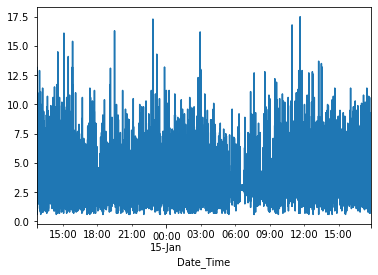

In [26]:
# This gives you a plot but not the one your want (shows time series data)
data_dict['2019-01-14_124200.144']['VTemand [mL]'].plot()

Two useful way of displaying the distribution of continuous data are `boxplots` and `histograms`

#### Boxplots

<AxesSubplot:>

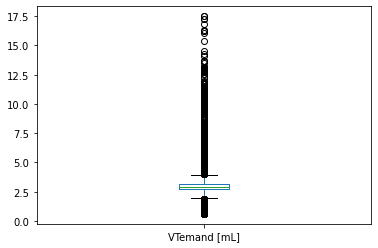

In [28]:
# That is better but it does not look nice because it shows all the outliers

data_dict['2019-01-14_124200.144']['VTemand [mL]'].plot(kind = 'box')

You can customize it - to some extent
Google DataFrame.plot()

[this is the first hit](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)
    

<AxesSubplot:ylabel='mL/kg'>

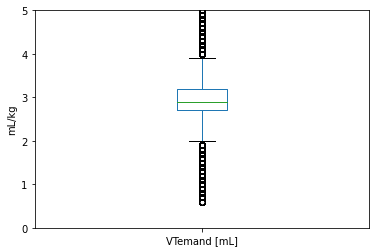

In [33]:
# That is better but it does not look nice because it shows all the outliers

data_dict['2019-01-14_124200.144']['VTemand [mL]'].plot(kind = 'box', ylim = [0,5], ylabel = 'mL/kg')

Even better - use `matplotlib` for plotting

{'whiskers': [<matplotlib.lines.Line2D at 0x7f89d8476550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f89d8476dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f89d84761d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f89d84836d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f89d8483ad0>],
 'means': []}

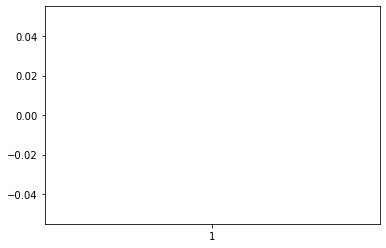

In [70]:
import matplotlib.pyplot as plt # Imports the matplotlib plotting library

# First we create the figure and the subplot(s)
fig, ax = plt.subplots()

# Then we populate the subplot(s)
ax.boxplot(data_dict['2019-01-14_124200.144']['VTemand [mL]'])

# It is an empty plot (although it does not throw an error)  - why ?

In [69]:
# Check there is data !!
data_dict['2019-01-14_124200.144']['VTemand [mL]']

Date_Time
2019-01-14 12:42:01    2.7
2019-01-14 12:42:02    2.8
2019-01-14 12:42:03    2.8
2019-01-14 12:42:04    2.9
2019-01-14 12:42:05    2.9
                      ... 
2019-01-15 17:50:50    NaN
2019-01-15 17:50:51    NaN
2019-01-15 17:50:52    NaN
2019-01-15 17:50:53    NaN
2019-01-15 17:50:54    NaN
Freq: S, Name: VTemand [mL], Length: 104934, dtype: float64

Let us Google it: "matplotlib boxplot empty"

[Look at Stackoverflow top hits](https://stackoverflow.com/questions/52960482/plt-boxplot-showing-up-blank-despite-thousands-of-varying-datapoints)

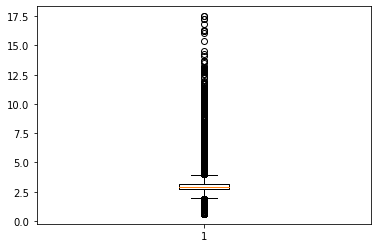

In [72]:
import matplotlib.pyplot as plt # Imports the matplotlib plotting library

# Removing empty data points helps

fig, ax = plt.subplots()
ax.boxplot(data_dict['2019-01-14_124200.144']['VTemand [mL]'].dropna());

How can we improve this further ??

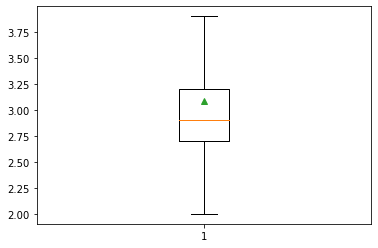

In [86]:
# Now the outliers are removed and the mean is shown

fig, ax = plt.subplots()
ax.boxplot(data_dict['2019-01-14_124200.144']['VTemand [mL]'].dropna(), showfliers = False, showmeans = True,);

This looks better but I would like to modify the error bars and the layout

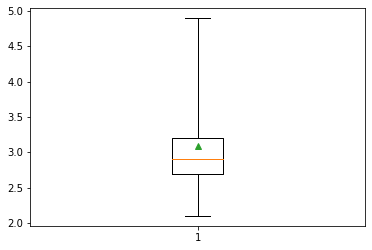

In [88]:
# # Whiskers show IQR by default, you can change it

fig, ax = plt.subplots()
ax.boxplot(data_dict['2019-01-14_124200.144']['VTemand [mL]'].dropna(), 
           whis = [5,95], showfliers = False, showmeans = True,);

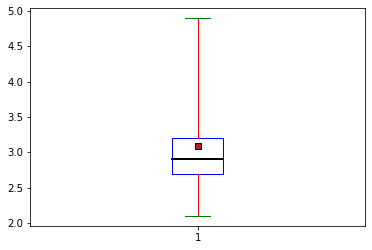

In [110]:
# You can customize the plot further

# Define styling for each boxplot component

meanprops = {'marker':'s', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'}
medianprops = {'color': 'black', 'linewidth': 2}
boxprops = {'color': 'blue', 'linestyle': '-'}
whiskerprops = { 'color': 'red', 'linestyle': '-'}
capprops = {'color': 'green', 'linestyle': '-'}
flierprops = {'color': 'black', 'marker': '.'}

fig, ax = plt.subplots()
ax.boxplot(data_dict['2019-01-14_124200.144']['VTemand [mL]'].dropna(), 
    whis = [5, 95], showfliers = False, showmeans = True, meanprops = meanprops,
    medianprops=medianprops, boxprops=boxprops, whiskerprops=whiskerprops, 
    capprops=capprops,flierprops = flierprops);

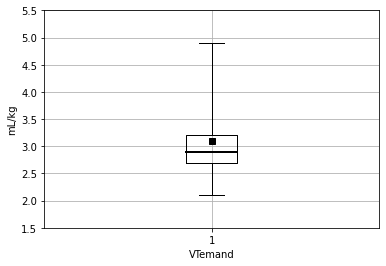

In [121]:
# Add more useful customisation
meanprops = {'marker':'s', 'markeredgecolor':'black', 'markerfacecolor':'black'}
medianprops = {'color': 'black', 'linewidth': 2}
boxprops = {'color': 'black', 'linestyle': '-'}
whiskerprops = { 'color': 'black', 'linestyle': '-'}
capprops = {'color': 'black', 'linestyle': '-'}
flierprops = {'color': 'black', 'marker': '.'}

fig, ax = plt.subplots()
ax.boxplot(data_dict['2019-01-14_124200.144']['VTemand [mL]'].dropna(), 
    whis = [5, 95], showfliers = False, showmeans = True, meanprops = meanprops,
    medianprops=medianprops, boxprops=boxprops, whiskerprops=whiskerprops, 
    capprops=capprops,flierprops = flierprops);

ax.set_xlabel('VTemand')
ax.set_ylabel('mL/kg')
ax.set_ylim(1.5, 5.5)
ax.grid(True)

# Further customization is possible

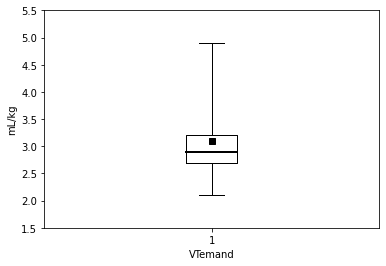

In [122]:
# How to save the graph

dpi = 300
filetype = 'jpg'

# Add more useful customisation
meanprops = {'marker':'s', 'markeredgecolor':'black', 'markerfacecolor':'black'}
medianprops = {'color': 'black', 'linewidth': 2}
boxprops = {'color': 'black', 'linestyle': '-'}
whiskerprops = { 'color': 'black', 'linestyle': '-'}
capprops = {'color': 'black', 'linestyle': '-'}
flierprops = {'color': 'black', 'marker': '.'}

fig, ax = plt.subplots()
ax.boxplot(data_dict['2019-01-14_124200.144']['VTemand [mL]'].dropna(), 
    whis = [5, 95], showfliers = False, showmeans = True, meanprops = meanprops,
    medianprops=medianprops, boxprops=boxprops, whiskerprops=whiskerprops, 
    capprops=capprops,flierprops = flierprops);

ax.set_xlabel('VTemand')
ax.set_ylabel('mL/kg')
ax.set_ylim(1.5, 5.5)

fig.savefig(os.path.join('results', f'boxplot_1{filetype}'), dpi = dpi, format = filetype, 
    bbox_inches='tight',);

#### Histograms

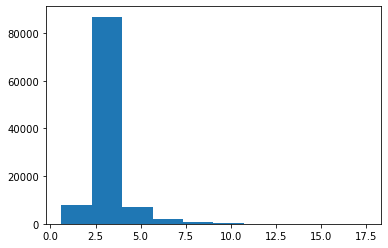

In [138]:
# First attempt..

fig, ax = plt.subplots()
ax.hist(data_dict['2019-01-14_124200.144']['VTemand [mL]']);

# You can customize the format further as for boxplots...

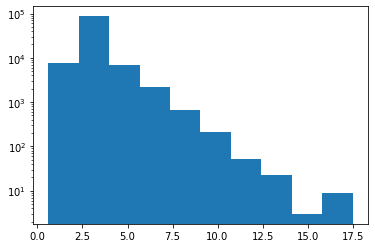

In [139]:
# A logarithmic y axis is useful to appreciate the present of outliers

fig, ax = plt.subplots()
ax.hist(data_dict['2019-01-14_124200.144']['VTemand [mL]'], log= True);

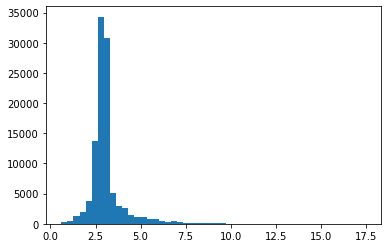

In [140]:
# Use more bins to reveal the actual distribution

fig, ax = plt.subplots()
ax.hist(data_dict['2019-01-14_124200.144']['VTemand [mL]'], bins = 50);

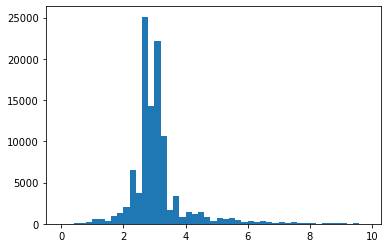

In [144]:
# You can define your own bins

# imports the numpy package
import numpy as np

bins = np.arange(0, 10, 0.2)
fig, ax = plt.subplots()
ax.hist(data_dict['2019-01-14_124200.144']['VTemand [mL]'], bins = bins);

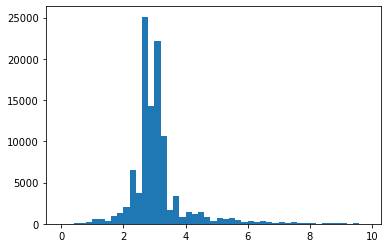

In [147]:
# You can define your own bins

# imports the numpy package
import numpy as np

bins = np.arange(0, 10, 0.2)
fig, ax = plt.subplots()
ax.hist(data_dict['2019-01-14_124200.144']['VTemand [mL]'], bins = bins);

In [ ]:
# I would like to show you a different way to produce histograms

In [ ]:
VTemand_binned = pd.cut(data_dict['2019-01-14_124200.144']['VTemand [mL]'], bins = 10)
VTemand_binned.head(10)

In [ ]:
VTemand_binned.value_counts()

In [ ]:
# Sort according the index, not the values
# Also, what one function returns can be passed on to the next function
VTemand_binned.value_counts().sort_index()

In [ ]:
# Better but still not what you want
VTemand_binned.value_counts().sort_index().plot()

In [ ]:
# Better but still not what you want
VTemand_binned.value_counts().sort_index().plot(kind = 'bar')

In [ ]:
plot = VTemand_binned.value_counts().sort_index().plot(kind = 'bar')

In [ ]:
import matplotlib.pyplot as plt

plot = VTemand_binned.value_counts().sort_index().plot(kind = 'bar')
plt.savefig(fname = os.path.join('results', 'VTemand'))

In [ ]:
import matplotlib.pyplot as plt

plot = VTemand_binned.value_counts().sort_index().plot(kind = 'bar', color = 'black', alpha = 0.7, 
            xlabel = 'VTemand_kg', ylabel = 'number of inflations',)
#plt.grid(True)
plt.savefig(fname = os.path.join('results', 'VTemand'))

In [ ]:
import matplotlib.pyplot as plt

plot = VTemand_binned.value_counts().sort_index().plot(kind = 'bar', color = 'black', alpha = 0.7, 
            xlabel = 'VTemand_kg', ylabel = 'number of inflations', logy = True)
#plt.grid(True)
plt.savefig(fname = os.path.join('results', 'VTemand'))

##### You need to do this for all relevant columns

In [148]:
data_dict['2019-01-14_124200.144'].columns

Index(['Time [ms]', 'Rel.Time [s]', 'MVe [L/min]', 'MVi [L/min]',
       'Cdyn [L/bar]', 'R [mbar/L/s]', 'MVespon [L/min]', 'Rpat [mbar/L/s]',
       'MVemand [L/min]', 'FlowDev [L/min]', 'VTmand [mL]', 'r2 [no unit]',
       'VTispon [mL]', 'Pmin [mbar]', 'Pmean [mbar]', 'PEEP [mbar]',
       'RRmand [1/min]', 'PIP [mbar]', 'VTmand [L]', 'VTspon [L]',
       'VTemand [mL]', 'VTespon [mL]', 'VTimand [mL]', 'VT [mL]', '% leak [%]',
       '% MVspon [%]', 'MV [L/min]', 'RRtrig [1/min]', 'RR [1/min]',
       'I (I:E) [no unit]', 'E (I:E) [no unit]', 'FiO2 [%]', 'VTspon [mL]',
       'E [mbar/L]', 'TC [s]', 'TCe [s]', 'C20/Cdyn [no unit]', 'VTe [mL]',
       'VTi [mL]', 'EIP [mbar]', 'MVleak [L/min]', 'RRspon [1/min]',
       'MVe [L/min/kg]', 'MVi [L/min/kg]', 'Cdyn [L/bar/kg]',
       'MVespon [L/min/kg]', 'MVemand [L/min/kg]', 'VTmand [mL/kg]',
       'VTispon [mL/kg]', 'VTmand [L/kg]', 'VTspon [L/kg]', 'VTemand [mL/kg]',
       'VTespon [mL/kg]', 'VTimand [mL/kg]', 'VT [mL/kg]', 'MV [L

In [149]:
columns_to_plot = [column for column in data_dict['2019-01-14_124200.144'].columns 
                  if column not in ['Time [ms]', 'Rel.Time [s]']]

columns_to_plot

['MVe [L/min]',
 'MVi [L/min]',
 'Cdyn [L/bar]',
 'R [mbar/L/s]',
 'MVespon [L/min]',
 'Rpat [mbar/L/s]',
 'MVemand [L/min]',
 'FlowDev [L/min]',
 'VTmand [mL]',
 'r2 [no unit]',
 'VTispon [mL]',
 'Pmin [mbar]',
 'Pmean [mbar]',
 'PEEP [mbar]',
 'RRmand [1/min]',
 'PIP [mbar]',
 'VTmand [L]',
 'VTspon [L]',
 'VTemand [mL]',
 'VTespon [mL]',
 'VTimand [mL]',
 'VT [mL]',
 '% leak [%]',
 '% MVspon [%]',
 'MV [L/min]',
 'RRtrig [1/min]',
 'RR [1/min]',
 'I (I:E) [no unit]',
 'E (I:E) [no unit]',
 'FiO2 [%]',
 'VTspon [mL]',
 'E [mbar/L]',
 'TC [s]',
 'TCe [s]',
 'C20/Cdyn [no unit]',
 'VTe [mL]',
 'VTi [mL]',
 'EIP [mbar]',
 'MVleak [L/min]',
 'RRspon [1/min]',
 'MVe [L/min/kg]',
 'MVi [L/min/kg]',
 'Cdyn [L/bar/kg]',
 'MVespon [L/min/kg]',
 'MVemand [L/min/kg]',
 'VTmand [mL/kg]',
 'VTispon [mL/kg]',
 'VTmand [L/kg]',
 'VTspon [L/kg]',
 'VTemand [mL/kg]',
 'VTespon [mL/kg]',
 'VTimand [mL/kg]',
 'VT [mL/kg]',
 'MV [L/min/kg]',
 'VTspon [mL/kg]',
 'VTe [mL/kg]',
 'VTi [mL/kg]',
 'MVleak [L

2021-05-07 16:46:04.744637 Working on MVe [L/min]
2021-05-07 16:46:05.043009 Working on MVi [L/min]
2021-05-07 16:46:05.275939 Working on Cdyn [L/bar]
2021-05-07 16:46:05.545401 Working on R [mbar/L/s]
2021-05-07 16:46:05.820107 Working on MVespon [L/min]
2021-05-07 16:46:06.041764 Working on Rpat [mbar/L/s]
2021-05-07 16:46:06.293536 Working on MVemand [L/min]
2021-05-07 16:46:06.546665 Working on FlowDev [L/min]
2021-05-07 16:46:06.817979 Working on VTmand [mL]
2021-05-07 16:46:07.061732 Working on r2 [no unit]
2021-05-07 16:46:07.330954 Working on VTispon [mL]
2021-05-07 16:46:07.565759 Working on Pmin [mbar]
2021-05-07 16:46:07.881314 Working on Pmean [mbar]
2021-05-07 16:46:08.113749 Working on PEEP [mbar]
2021-05-07 16:46:08.372187 Working on RRmand [1/min]
2021-05-07 16:46:08.634950 Working on PIP [mbar]
2021-05-07 16:46:08.938573 Working on VTmand [L]
2021-05-07 16:46:09.191332 Working on VTspon [L]
2021-05-07 16:46:09.441507 Working on VTemand [mL]
2021-05-07 16:46:09.729135 W

FileNotFoundError: [Errno 2] No such file or directory: 'results/C20/Cdyn.jpg'

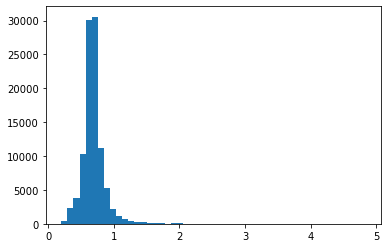

In [162]:
dpi = 300
filetype

for column in columns_to_plot:
    print(datetime.datetime.now(), f'Working on {column}')
    
    fig, ax = plt.subplots()
    ax.hist(data_dict['2019-01-14_124200.144'][column], bins = 50)
    
    fname = column.split(' ')[0]
    plt.savefig(fname = os.path.join('results', f'{fname}.{filetype}'), dpi = dpi, format = filetype, 
    bbox_inches='tight',)
    plt.close()

2021-05-07 16:46:19.020051 Working on MVe [L/min]
2021-05-07 16:46:19.360689 Working on MVi [L/min]
2021-05-07 16:46:19.628141 Working on Cdyn [L/bar]
2021-05-07 16:46:19.913359 Working on R [mbar/L/s]
2021-05-07 16:46:20.220113 Working on MVespon [L/min]
2021-05-07 16:46:20.778737 Working on Rpat [mbar/L/s]
2021-05-07 16:46:21.075537 Working on MVemand [L/min]
2021-05-07 16:46:21.376278 Working on FlowDev [L/min]
2021-05-07 16:46:21.668910 Working on VTmand [mL]
2021-05-07 16:46:21.958803 Working on r2 [no unit]
2021-05-07 16:46:22.270588 Working on VTispon [mL]
2021-05-07 16:46:22.548991 Working on Pmin [mbar]
2021-05-07 16:46:22.833310 Working on Pmean [mbar]
2021-05-07 16:46:23.116213 Working on PEEP [mbar]
2021-05-07 16:46:23.552419 Working on RRmand [1/min]
2021-05-07 16:46:23.821480 Working on PIP [mbar]
2021-05-07 16:46:24.129788 Working on VTmand [L]
2021-05-07 16:46:24.436325 Working on VTspon [L]
2021-05-07 16:46:24.713365 Working on VTemand [mL]
2021-05-07 16:46:25.015821 W

/Users/guszti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


2021-05-07 16:46:25.325247 Working on VTimand [mL]


/Users/guszti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


2021-05-07 16:46:25.660751 Working on VT [mL]
2021-05-07 16:46:25.969447 Working on % leak [%]
2021-05-07 16:46:26.305172 Working on % MVspon [%]
2021-05-07 16:46:26.648506 Working on MV [L/min]
2021-05-07 16:46:27.179274 Working on RRtrig [1/min]
2021-05-07 16:46:27.482561 Working on RR [1/min]
2021-05-07 16:46:27.743869 Working on I (I:E) [no unit]
2021-05-07 16:46:28.002241 Working on E (I:E) [no unit]
2021-05-07 16:46:28.301145 Working on FiO2 [%]
2021-05-07 16:46:28.571328 Working on VTspon [mL]
2021-05-07 16:46:28.833928 Working on E [mbar/L]
2021-05-07 16:46:29.104084 Working on TC [s]
2021-05-07 16:46:29.400158 Working on TCe [s]
2021-05-07 16:46:29.672705 Working on C20/Cdyn [no unit]
2021-05-07 16:46:29.936250 Working on VTe [mL]
2021-05-07 16:46:30.247847 Working on VTi [mL]
2021-05-07 16:46:30.534345 Working on EIP [mbar]
2021-05-07 16:46:30.818982 Working on MVleak [L/min]
2021-05-07 16:46:31.381464 Working on RRspon [1/min]
2021-05-07 16:46:31.692708 Working on MVe [L/min

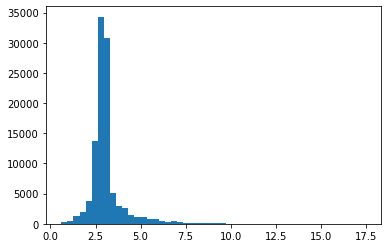

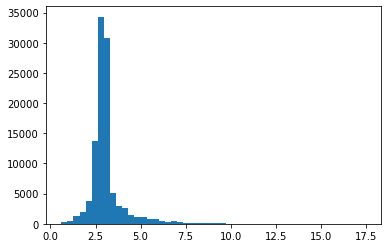

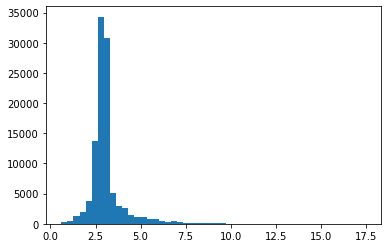

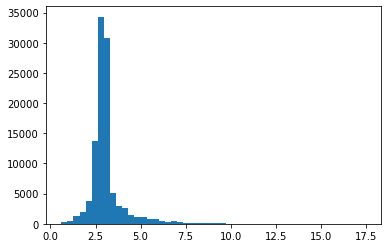

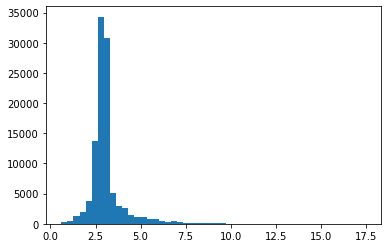

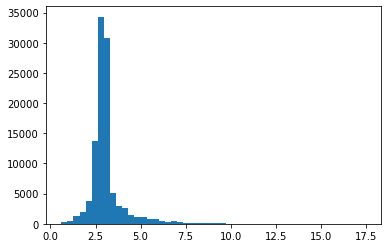

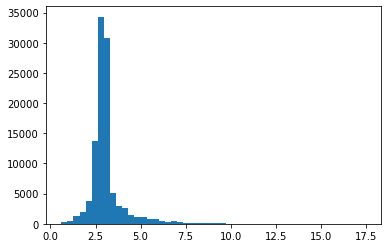

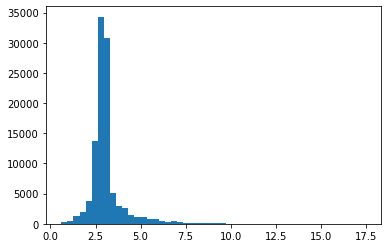

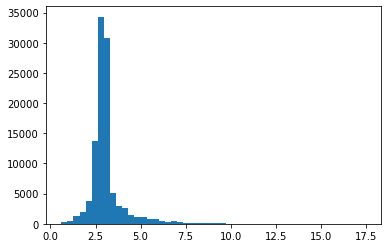

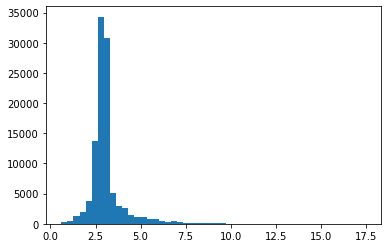

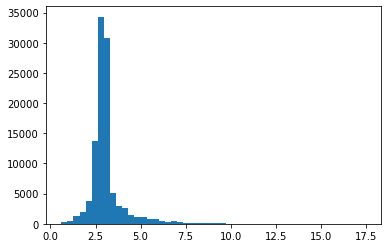

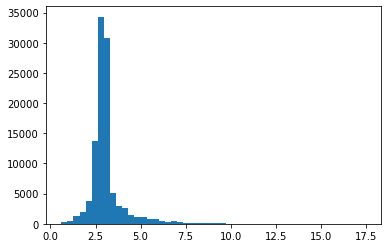

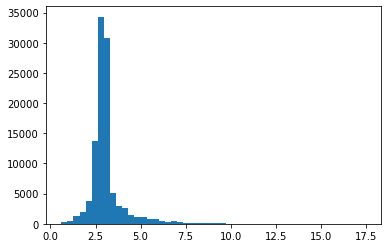

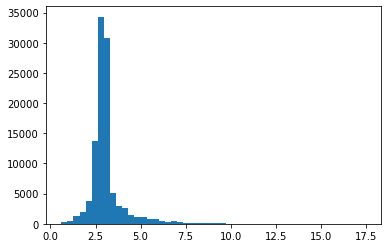

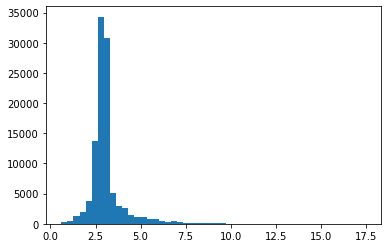

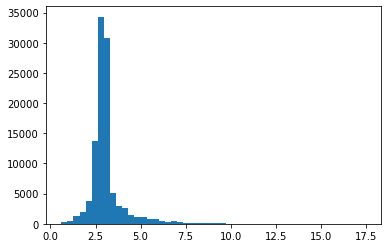

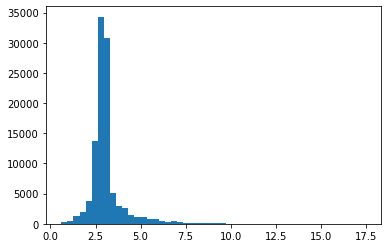

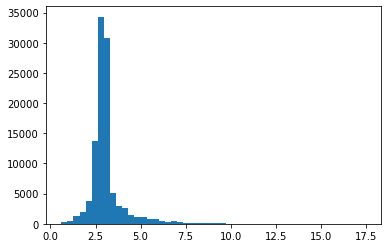

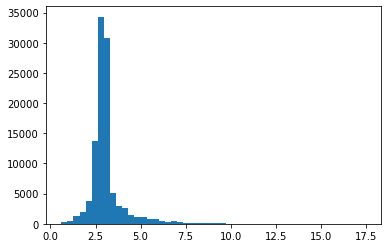

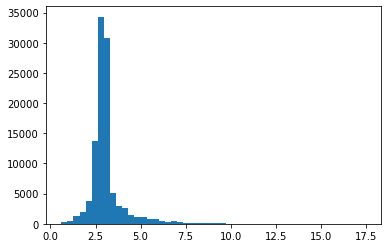

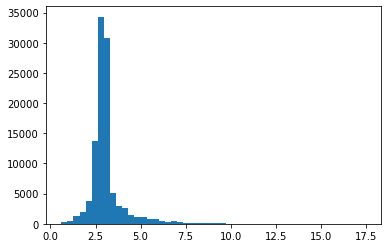

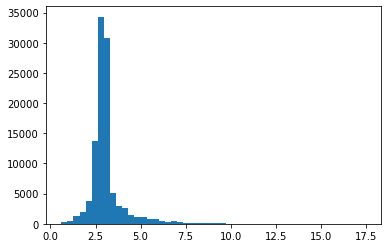

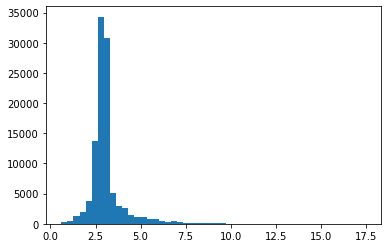

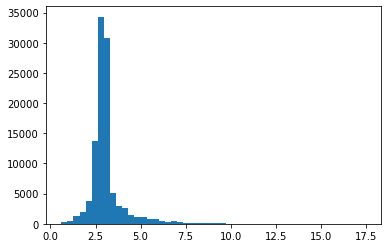

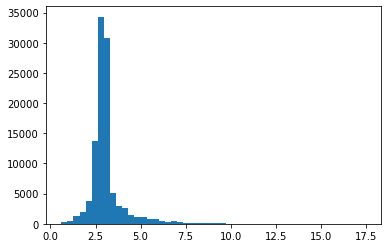

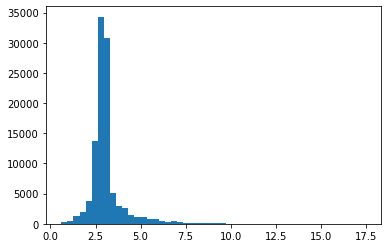

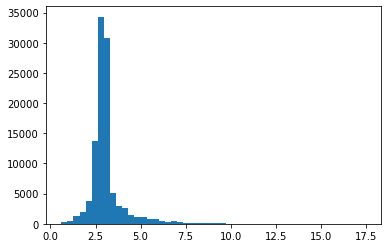

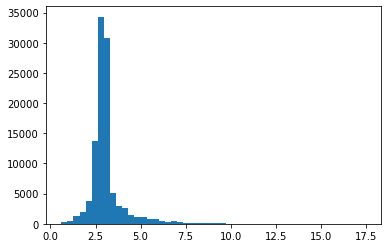

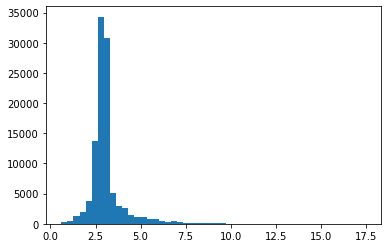

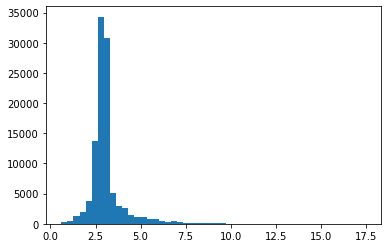

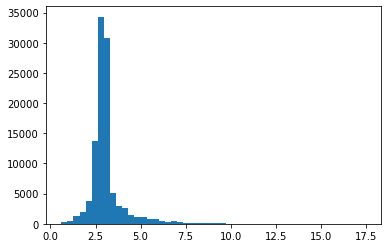

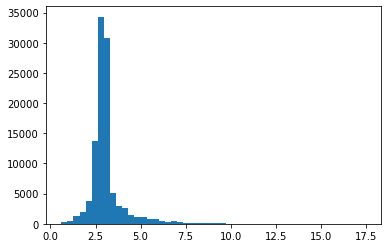

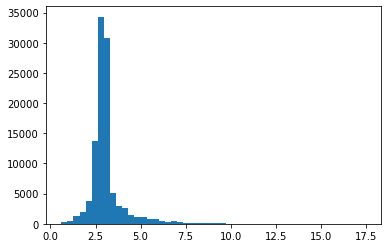

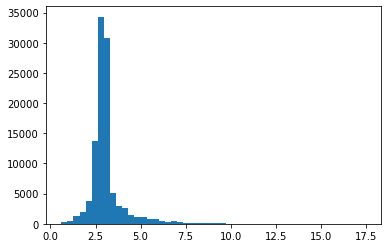

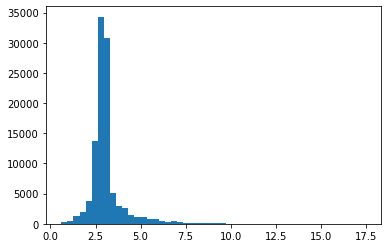

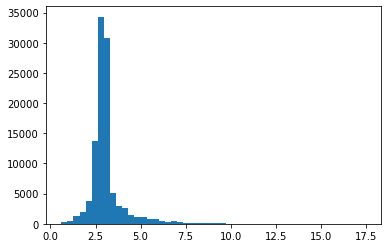

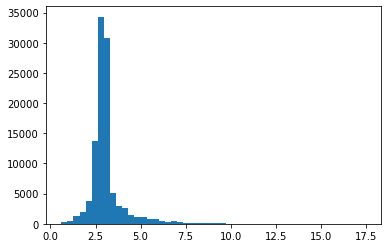

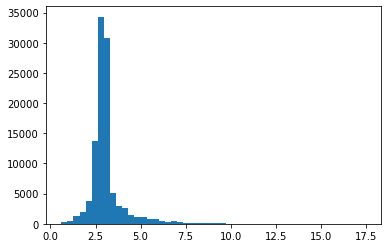

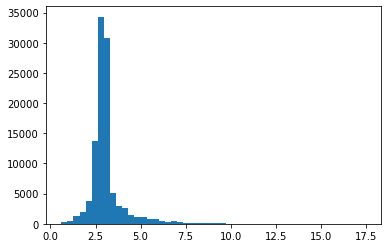

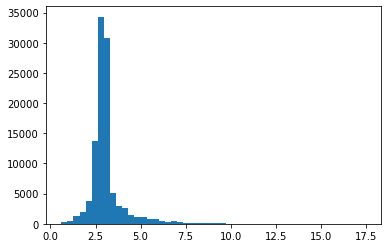

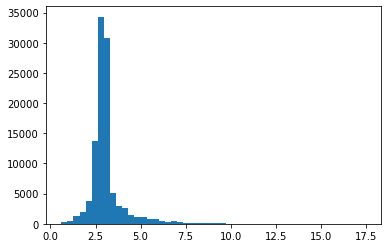

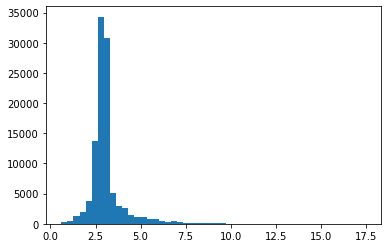

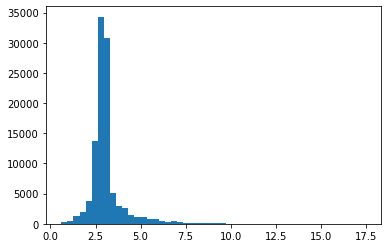

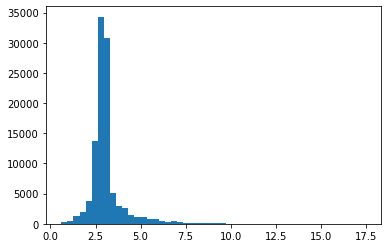

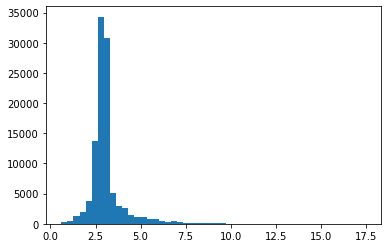

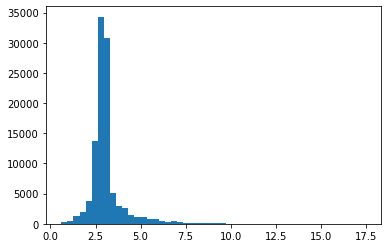

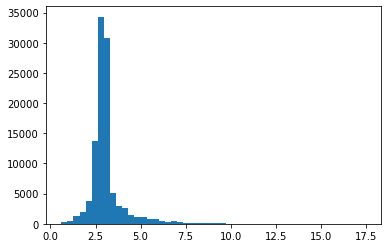

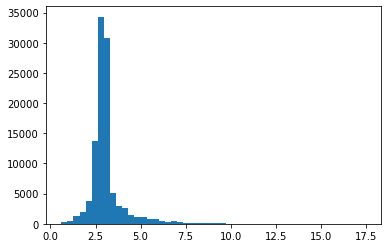

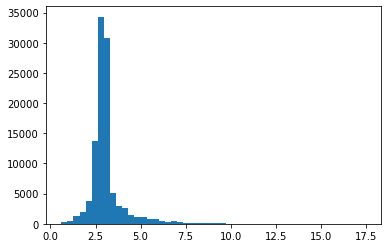

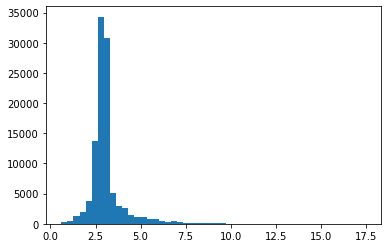

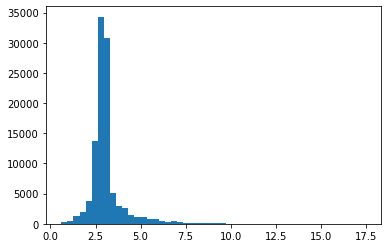

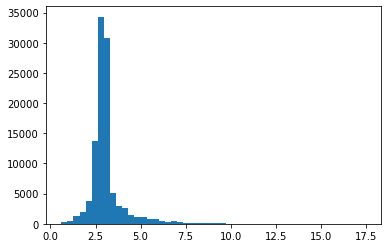

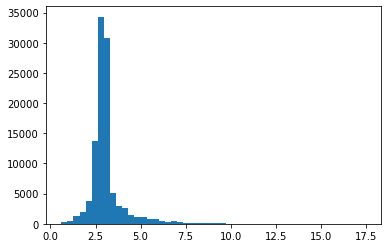

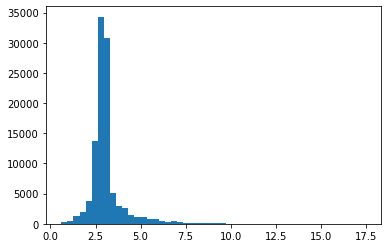

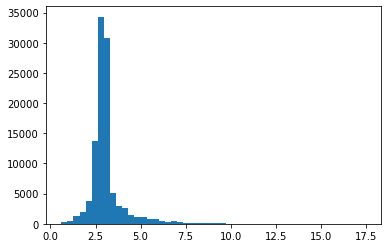

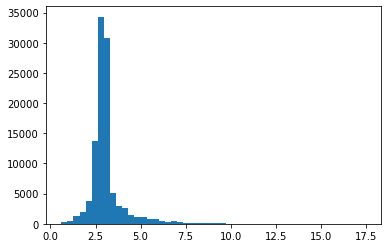

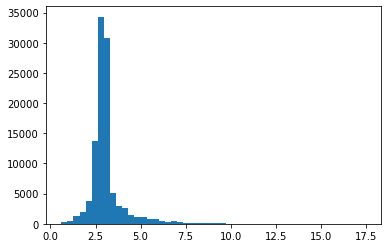

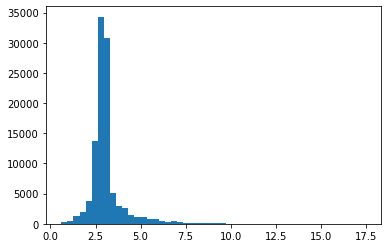

In [163]:
for column in columns_to_plot:
    print(datetime.datetime.now(), f'Working on {column}')
    
    fig, ax = plt.subplots()
    ax.hist(data_dict['2019-01-14_124200.144']['VTemand [mL]'], bins = 50)
    
    fig, ax = plt.subplots()
    ax.hist(data_dict['2019-01-14_124200.144'][column], bins = 50)
    
    if column == 'C20/Cdyn [no unit]':
        fname = 'C20_Cdyn'
    else:
        fname = column.split(' ')[0]
    
    plt.savefig(fname = os.path.join('results', f'{fname}.{filetype}'), dpi = dpi, format = filetype, 
    bbox_inches='tight')
    plt.close()